<a href="https://colab.research.google.com/github/flowonthegoliv/ENVS666_2022/blob/main/extra_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt


In [91]:
df = pd.read_csv('f008d1cbd13c.csv',sep=';')
df

,Date & Time,Temperature,Humidity,PM1.0,PM2.5,PM10
0,2021-10-27 17:04:49,18.57,62.40,0.000794,8.024885e-04,2.080711
1,2021-10-27 17:06:07,18.78,62.23,0.000000,6.931414e-310,0.000000
2,2021-10-27 17:10:49,19.06,60.86,1.382680,4.296537e+00,12.044024
3,2021-10-27 17:09:12,18.93,60.90,0.000000,1.792861e-316,0.000000
4,2021-10-28 18:10:12,17.47,69.49,0.757062,2.280473e+00,11.889235
...,...,...,...,...,...,...
5507,2022-02-12 07:10:05,5.15,93.28,1.211290,6.050813e+00,19.139292
5508,2022-02-12 07:39:59,5.44,91.91,1.166558,6.268396e+00,14.782613
5509,2022-02-12 08:09:54,5.59,91.46,1.318408,5.877032e+00,14.396276
5510,2022-02-12 08:39:49,5.66,92.53,1.386052,6.048316e+00,15.956651


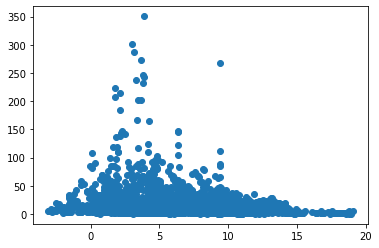

In [92]:
dates = df['Date & Time']
dates = pd.DatetimeIndex(dates)

temperature = df['Temperature'].array
pm2p5 = df['PM2.5']
pm10 = df['PM10']


#scatter temperautre vs PM2.5
plt.scatter(temperature,pm2p5)


In [93]:
# calculating the average
mean_pm2p5 = np.nanmean(pm2p5)
print(mean_pm2p5)
#calculate the std
std_pm2p5 = np.nanstd(pm2p5)
print(std_pm2p5)

14.514419312320125
18.968548073430096


Text(0.5, 1.0, 'freq vs. NO2 concentration')

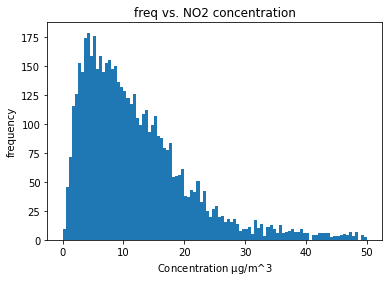

In [94]:
counts, bins, bars = plt.hist(pm2p5,bins=100,range=[0,50]) #here we can set the number of bins and the ranges 
plt.ylabel('frequency')
plt.xlabel('Concentration µg/m^$3$')
plt.title('freq vs. NO2 concentration')

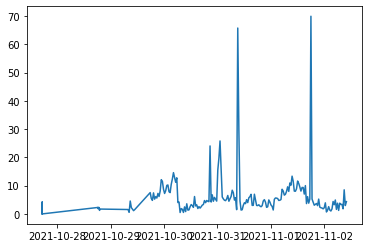

In [97]:
plt.plot(dates[1:200],pm2p5[1:200])

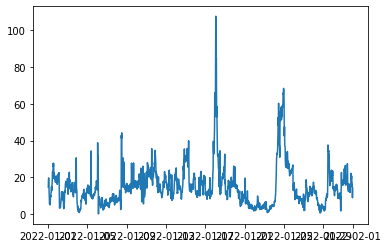

In [98]:
#this will find in the time where all months are January
dates.month==1
#how seperate from data 
jan_pm2p5 = pm2p5[dates.month==1]
jan_dates = dates[dates.month==1]

plt.plot(jan_dates,jan_pm2p5)


22.147149732125175


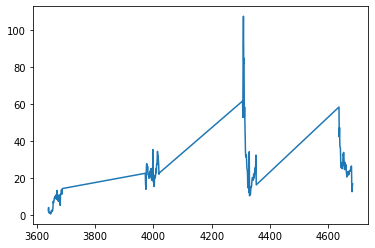

In [99]:
monday_jan_pm2p5 = pm2p5[np.logical_and(dates.month==1,dates.day_of_week==1)]
plt.plot(monday_jan_pm2p5)
ave = np.nanmean(monday_jan_pm2p5)
print(ave)

15.500767902727576
13.719599919907946


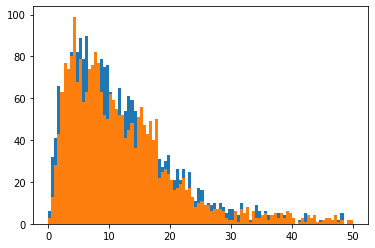

In [100]:
#total average for morning and afternoon 
ave_morn = np.nanmean(pm2p5[dates.hour < 12])
ave_aft = np.nanmean(pm2p5[dates.hour > 12])

print(ave_morn)
print(ave_aft)

counts, bins, bars = plt.hist(pm2p5[dates.hour < 12],bins=100,range=[0,50])
counts, bins, bars = plt.hist(pm2p5[dates.hour > 12],bins=100,range=[0,50])

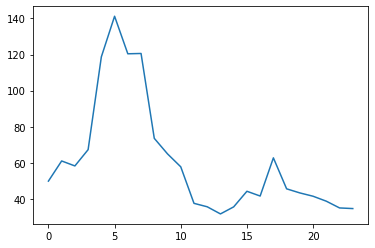

In [101]:
#calculate pollutants through hours of the day 
ave_pm10_hours = np.zeros([24,])
for i in range(0,24):
  ave_pm10_hours[i] = np.nanmean(pm10[dates.hour == i])
plt.plot(ave_pm10_hours)  

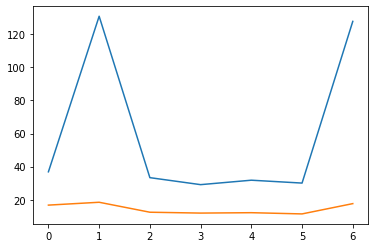

In [102]:
#calculate levels at days of the week
ave_pm10_days = np.zeros([7,])
ave_pm2p5_days = np.zeros([7,])

for i in range(0,7):
  ave_pm10_days[i] = np.nanmean(pm10[dates.day_of_week==i])    
  ave_pm2p5_days[i] = np.nanmean(pm2p5[dates.day_of_week==i])

plt.plot(ave_pm10_days)
plt.plot(ave_pm2p5_days)